<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_5_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow

In [ ]:
from tensorflow.keras.layers import Input, Dense,Dropout, Activation
from tensorflow.keras.models import Model
import seaborn as sns
import pandas as pd

In [ ]:
dataset = sns.load_dataset('iris')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x= dataset.drop(['species'],axis=1)
y = pd.get_dummies(dataset.species,prefix='output')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=39)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
entrada = Input(shape=(x_train.shape[1],))
camada_1 = Dense(100,activation='relu')(entrada)
camada_2 = Dense(50,activation='relu')(camada_1)
camada_3 = Dense(25,activation='relu')(camada_2)
saida = Dense(y_train.shape[1],activation='softmax')(camada_3)

In [ ]:
model = Model(inputs=entrada,outputs=saida)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 78        
Total params: 6,903
Trainable params: 6,903
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
history = model.fit(x_train,y_train, batch_size=4,epochs=20,verbose=1,validation_split=0.20)

Epoch 1/20
24/24 [==============================] - 0s 9ms/step - loss: 0.9438 - acc: 0.5729 - val_loss: 0.8464 - val_acc: 0.7083
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.6185 - acc: 0.8125 - val_loss: 0.6775 - val_acc: 0.7500
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.4566 - acc: 0.8229 - val_loss: 0.5573 - val_acc: 0.7917
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3441 - acc: 0.8750 - val_loss: 0.4470 - val_acc: 0.7917
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2556 - acc: 0.9062 - val_loss: 0.3751 - val_acc: 0.7917
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1892 - acc: 0.9271 - val_loss: 0.3436 - val_acc: 0.7917
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1469 - acc: 0.9688 - val_loss: 0.2871 - val_acc: 0.8750
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1274 - acc: 0.96

# SVM

In [ ]:
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [ ]:
iris = datasets.load_iris()

In [ ]:
df_iris = pd.DataFrame(data= np.c_[iris['data'],iris['target']],
                       columns=iris['feature_names']+['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
x=df_iris.iloc[:, :-1]
y=df_iris.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



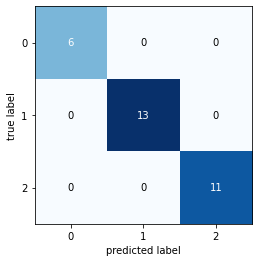

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Neural Network

In [ ]:
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [ ]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'],iris['target']],
                       columns=iris['feature_names']+['target'])
x=df_iris.iloc[:, :-1]
y=df_iris.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,5),random_state=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        12
         2.0       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



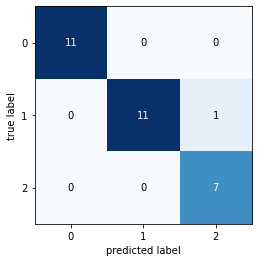

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()